# AI+X R-Py 중간과제
**2019083209 김성환**  
**컴퓨터소프트웨어학부 2학년**

## Part 1

### Q1.  본 질문에서는 뉴스를 키워드로 하여 뉴스 검색 첫번째 페이지에서 네이버 플랫폼에서 포맷팅된 뉴스 링크 즉  “https://news.naver.com/main/read.nhn” 로 시작하는 모든 링크를 t수집해 보려고 한다.

먼저 필요한 모듈을 import 하고, 뒤에서 진행상황을 알아보기 위한 progress 함수를 만들어주었습니다.

In [1]:
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import re
import sys

def progress(i, total):
    print(f"{i+1}/{total}\r", end="")
    if i+1==total:
        print("\nFinished")

그 다음, `urllib.request.urllib`를 활용하여, 금리 키워드로 2020.04.13부터, 2020.04.14까지의 뉴스페이지를 긁어왔습니다.  

"금리"라는 키워드는 url에 사용되기 위해서는 quote로 바뀌어야 하기 때문에 urllib.parse.quote를 통해서 바꾸어주었습니다.  

In [2]:
key_words = urllib.parse.quote("금리")
url = "https://search.naver.com/search.naver?where=news&query="+ key_words+ "&sm=tab_opt&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.04.13&de=2020.04.14"
req = urllib.request.urlopen(url)

`read()`함수를 통해 request로 불러온 웹페이지를 불러왔습니다. utf-8로 인코딩된 문서를 `decode()` 함수를 통해 데이터를 사용할 수 있도록 만들었습니다.  
이후, BeautifulSoup를 통해 soup 객체로 만들어주었습니다.  
soup 객체에서 `findAll()`를 통해 a태그가 붙은 문서들을 모두 불러왔습니다.

In [3]:
data = req.read().decode('utf-8')
soup = BeautifulSoup(data, 'html.parser')
anchor_set = soup.findAll('a')

news_link라는 빈 리스트를 만들어 Regex를 통해 hrdf attribute가 `https://news.naver.com/main/read.nhn`로 시작하는 모든 데이터를 긁어왔습니다.  

In [4]:
news_link = []
for item in anchor_set:
    if re.search('^https://news.naver.com/main/read.nhn',item['href']):
        news_link.append(item['href'])

과제 명세서에 나와있던 방법으로 총 기사수를 불러왔습니다.

In [5]:
count_tag = soup.find("div", {"class", "title_desc all_my"})
count_text = count_tag.find("span").get_text().split()
total_num = count_text[-1][0:-1].replace(",","")

### Q2. 위에서 제시된 total_num을 이용해서 “금리” 검색 관련해서 전체 기사에 대해 네이버 플랫폼에서포맷팅된 뉴스 링크 즉  “https://news.naver.com/main/read.nhn” 로 시작하는 모든 링크를 찾아서 new_link 리스트에 저장한다.

같은 방법으로, `https://news.naver.com/main/read.nhn`으로 시작하는 모든 href태그들을 불러와서 news_link 리스트에 append해주었습니다.  
만약, 링크가 이미 list에 존재할 경우, append하지 않도록 설계하였습니다.

In [6]:
news_link = []
key_words = urllib.parse.quote("금리")
for val in range(int(total_num)//10):
    progress(val,int(total_num)//10)
    start_val = str(10*val + 1)
    url = "https://search.naver.com/search.naver?where=news&query=" + key_words + "&sm=tab_opt&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.04.13&de=2020.04.14&docid=&nso=so:r,p:from20191013to20191014,a:all&mynews=0&cluster_rank=26&start=" + start_val + "&refresh_start=0"
    req = urllib.request.urlopen(url)
    data = req.read().decode('utf-8')
    soup = BeautifulSoup(data, 'html.parser')
    anchor_set = soup.findAll('a')
    for item in anchor_set:
        if re.search('^https://news.naver.com/main/read.nhn', item['href']):
            if not item['href'] in news_link:
                news_link.append(item['href'])

129/129
Finished


### Q3. 위에서 구성한 news_link 리스트를 이용해서 뉴스 제목과 뉴스 본문 내용을 각각 title_list와 text_list로 저장한다.

같은 방법으로, title_list와 text_list라는 빈 리스트를 만들어서, BeautifulSoup를 통해 artistTitle, articleBodyContents라는 id를 가진 item들을 불러왔습니다.  
이를 각각 리스트에 append하여 리스트로 저장하였습니다.

In [7]:
title_list = []
text_list = []

for i, url in enumerate(news_link):
    progress(i, len(news_link))
    req = urllib.request.urlopen(url)
    data = req.read()
    soup = BeautifulSoup(data, 'html.parser')
    title = soup.find("h3", {"id": "articleTitle"}).get_text()
    text = soup.find("div", {"id": "articleBodyContents"}).get_text()
    title_list.append(title)
    text_list.append(text)

417/417
Finished


### Q4. title_list에 저장된 뉴스 제목에 대해 “금리”로 시작하고, 중간에 모든 문자가 여러 번 나와도 상관없으며, “인하”로 끝나는 문자열이 있는지 정규표현식을 활용하여 검색하고, 이 검색이 맞으면 제목을 출력하는 프로그램을 구현하라.

Regex를 통해 금리로 시작해서 인하로 끝나는 문자열들을 찾아 출력해주었습니다.

In [8]:
for i, title in enumerate(title_list):
    if re.search(".*금리.*인하.*", title):
        print(i,"> ", title)

3 >  용산구, 중소·소상공인·청년기업 융자금리 0%대로 인하
4 >  용산구, 코로나 피해 중소상공인·청년기업 살린다…융자금리 0%대로 인하
5 >  용산구, 중소·청년기업 융자금리 0%대로 인하
11 >  자본硏 "국채매입제도 도입·기준금리 추가 인하 필요"
13 >  자본시장연구원 “국채금리 안정화 위해 국채매입·금리인하 필요”
14 >  [우정이야기]우체국보험 약관 대출 금리 인하
22 >  5월 금리인하 전망 ‘솔솔’…“실효하한은 가변적”
23 >  내달 금리인하 전망… 유동성 활용 가능성도
29 >  "한은, 이르면 5월 추가 금리인하…장기채 매수 유리"


## Part 2

- 보스턴 주택 가격 데이터의 변수명은 다음과 같다.  

|변수명|설명|
|---|------------------------|
|CRIM|자치시(town) 별 1인당 범죄율|
|ZN|25,000 평방피트를 초과하는 거주지역의 비율|
|INDUS|비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|찰스강에 대한 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|10ppm 당 농축 일산화질소|
|RM|주택 1가구당 평균 방의 개수|
|AGE|1940년 이전에 건축된 소유주택의 비율|
|DIS|5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|방사형 도로까지의 접근성 지수|
|TAX|10,000 달러 당 재산세율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. |
|LSTAT|모집단의 하위계층의 비율(%)|
|MEDV|본인 소유의 주택가격(중앙값) (단위: $1,000)|
|CAT.MEDV|MEDV가 30,000 달러를 넘는지에 대한 변수(넘는 경우 1, 아닌 경우 0)|

- 보스턴 주택 가격 데이터에서 결측치는 na와 NaN으로 표시되어 있다. 

### Q5. 다음과 같은 데이터 전처리를 시행하라.
1. 제공된 boston_csv.csv 파일을 사용하여 pandas 데이터 프레임 객체를 만든다, 결측치 코드인 na와 NaN이 모두 실제 결측치로 되도록 한다.  
2. 이와 같은 결측치가 있는 관측치를 모두 제거한다.

먼저 필요한 모듈들을 불러왔습니다.

In [9]:
from sklearn.linear_model import LinearRegression 
from  sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

이후, 데이터 전처리를 진행해주었습니다.  
`boston_csv.csv`파일을 불러와 dataframe 객체로 만든 후, 결칙지를 na와 naN에서 np.nan으로 바꾸어주었습니다.

In [10]:
df = pd.read_csv('./boston_csv.csv')
df = df.replace("na", np.nan)
df = df.replace('NaN", np.nan)')
df = df.dropna(axis=0)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
5    0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222   
6    0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT. MEDV  
2       17.8  392.83   4.03  34.7          1  
3       18.7  394.63   2.94  

### Q6. 다음과 같은 요약 통계를 구하라.
1. describe 메소드를 적용해서 각 변수병 요약 통계를 구한다.
2. 상관관계를 구한후 seaborn 라이브러리의 heatmap 을 구현한다.

먼저 `describe()`를 통해 각 변수별 통계를 보았습니다.

In [11]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS          RM         AGE  \
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean     3.641708   11.418327   11.163765    0.069721    6.284805   68.514542   
std      8.629979   23.396912    6.873538    0.254930    0.705085   28.247125   
min      0.009060    0.000000    0.460000    0.000000    3.561000    2.900000   
25%      0.082492    0.000000    5.190000    0.000000    5.884250   44.550000   
50%      0.262660    0.000000    9.690000    0.000000    6.208500   77.150000   
75%      3.689387   12.500000   18.100000    0.000000    6.628000   94.100000   
max     88.976200  100.000000   27.740000    1.000000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B        MEDV  \
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean     3.797274    9.605578  409.095618   18.456574  356.353506   22.564343   
std      2.111828    8.7171

상관관계를 `corr()`를 통해 구한 후, heatmap를 출력해보았습니다.

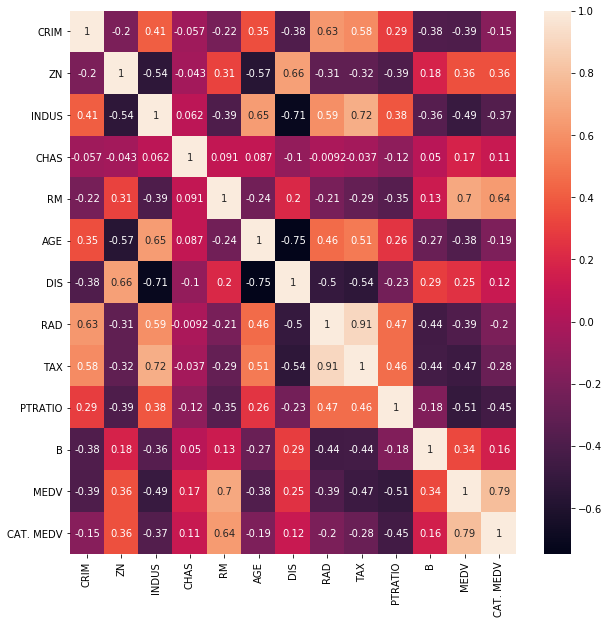

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### Q7 다음과 같은 단순회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
- 모집단의 하위계층의 비율(LSTAT)이 독립변수
- 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
- Training set이 표본의 75%를 차지한다.
- Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.
- Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.

먼저 `train_test_split`를 위해 `sklearn.model_selection`에서 불러왔습니다.

In [13]:
from sklearn.model_selection import train_test_split

이후, 독립변수로 LSTAT를, 종속변수로 MEDV를 dataframe으로부터 불러왔습니다.

In [14]:
x = df[['LSTAT']]
y = df['MEDV']

`train_test_split`을 통해 train데이터와 test데이터를 75:25로 나누어 주었습니다.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

회귀모델로는 `LinearRegression()`을 불러와서 사용하였고, `fit()`를 통해 학습을 진행시켰습니다.  
이후, R^2 값과 MSE를 출력해 보았습니다.

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

print("Training Set")
print("Rsquare = ", model.score(x_train, y_train))
print("MSE = ", mean_squared_error(y_train, y_hat_train))
print("")

print("Testing Set")
print("MSE = ", mean_squared_error(y_test, y_hat_test))

Training Set
Rsquare =  0.5411319824508232
MSE =  40.27627752592205

Testing Set
MSE =  32.07645208363777


Q8. 다음과 같은 다중회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
- 모집단의 하위계층의 비율(LSTAT)과 10,000 달러 당 재산세율(TAX)가  독립변수
- 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
- Training set이 표본의 75%를 차지한다.
- Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.
- Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.

같은 방법으로 train set과 test set을 나누고 성능을 출력해 보았습니다.

In [17]:
x = df[['LSTAT', 'TAX']]
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

print("Training Set")
print("Rsquare = ", model.score(x_train, y_train))
print("MSE = ", mean_squared_error(y_train, y_hat_train))
print("")

print("Testing Set")
print("MSE = ", mean_squared_error(y_test, y_hat_test))

Training Set
Rsquare =  0.5482050614575328
MSE =  39.65545131415305

Testing Set
MSE =  31.56493746549088
